## Residual-based estimation

Let $X \sim U[-2,2]$ and 

\begin{equation}
Y_i=a\left\{X_i+2 \exp \left(-16 X_i^2\right)\right\}+\sigma\left(X_i\right) \varepsilon_i
\end{equation}

where $\varepsilon \sim \mathcal{N} \left(0,\sigma_{\varepsilon}^{2}\right)$.

We estimate the regression function 
\begin{equation}
m \left(X_{i} \right) = \mbox{ E} \left(Y_{i} \mid X_{i} \right)
\end{equation}

In [1]:
from functions import *
import matplotlib.pyplot as plt

In [10]:
#Setting 
#Hyperparameter set-up
n = 1000
h=0.2
a=0.5

#Data generation 
X = np.random.uniform(-2,2,n)
X.sort()
y = fan(X,n,a)

 #MCAR p= 0.8
pi_hat = [pi_hat(h,z,y,pi(y,1,1),n) for z in np.linspace(-1,1, n)]

TypeError: 'list' object is not callable

We want to estimate

\begin{equation}
\sigma_{n}^{2} \left(x\right) = \frac{
\sum_{i=1}^{n} \widehat{r} \left(X_{i}\right) K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} K \left(
    \frac{x-X_{i} }{h}
    \right)},
\end{equation}

where $\widehat{r} \left(X_{i}\right) = \left\{Y_{i}-m_n \left(X_{i} \right)\right\}^{2}$.



In [11]:
#Estimated regression functions 

m_hat_nw = [nw(h,t,X,y) for t in X ]

m_hat_hw = [nw_mis(h,t,X,y,pi(y,1,1),n) for t in X ]

m_hat_hw_est = [nw_mis(h,t,X,y,pi_hat,n) for t in X]

#Residual estimates 

r_hat = (y-m_hat_nw)**2

r_hat_hw = (y-m_hat_hw)**2

r_hat_hw_est = (y-m_hat_hw_est)**2

In [12]:
def diff_vol(h,x,X,y):
    diff = []
    for i in range(1,len(y)):
        diff.append(((y[i]-y[i-1])**2)/2)
    #
    return diff, np.sqrt(sum(diff*norm.pdf((x-X[1:(len(X))])/h))/h)



[]

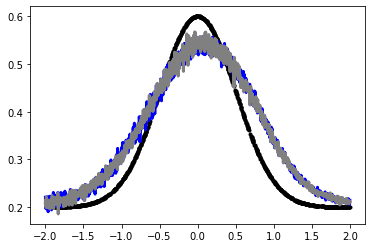

In [13]:
h1 = 0.4

fig, ax = plt.subplots(1, 1)
ax.plot(X,sigma_reg(X,n),'o', color='black',markersize=3)
ax.plot(np.linspace(-2, 2, n),[sigma_res(h1,t,X,r_hat) for t in np.linspace( -2, 2, n)],color= 'red', lw=3)
ax.plot(np.linspace(-2, 2, n),[sigma_mis_res(h1,t,X,r_hat_hw,pi(y,1,1),n) for t in np.linspace( -2, 2, n)],'-g',color= 'blue', lw=3)

ax.plot(np.linspace( -2, 2, n),[sigma_mis_res(h1,t,X,r_hat_hw_est,pi_hat,n) for t in np.linspace( -2, 2, n)],'-g',color= 'grey', lw=3)

#ax.plot(np.linspace(-2, 2, n),[diff_vol(0.001,t,X,y) for t in np.linspace(-2, 2, n)],'-g',color= 'red', lw=3)

ax.plot()